In [40]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [33]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

Text(0,0.5,'EJE Y')

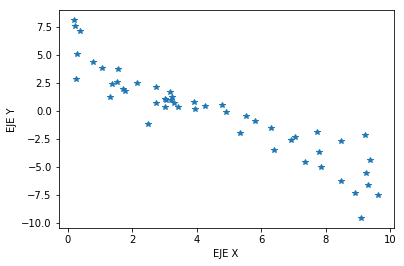

In [34]:
plt.plot(x,y, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

In [45]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [57]:
x2 = np.linspace(0,10,20)
y2 = m_ls * x2 + b_ls
error = 0.5

Text(0,0.5,'EJE Y')

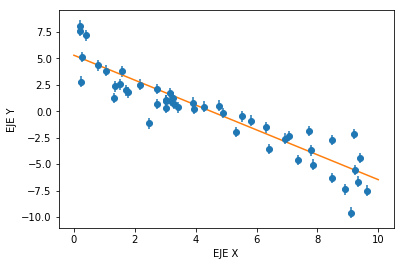

In [58]:
plt.errorbar(x, y, yerr=error, fmt="o")
plt.plot(x2,y2, "-")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

In [59]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [60]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

In [61]:
y3 = m_ml * x2 + b_ml

Text(0,0.5,'EJE Y')

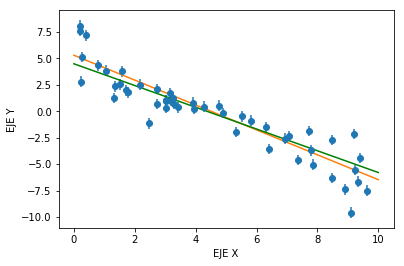

In [62]:
plt.errorbar(x, y, yerr=error, fmt="o")
plt.plot(x2,y2, "-")
plt.plot(x2,y3, "-", color = 'g')
plt.xlabel("EJE X")
plt.ylabel("EJE Y")